#Task 1



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv")
df.head()

In [ ]:
#EDA
print(df.info())
print("\n\nEmpty values:\n",df.isnull().sum())

In [ ]:
#Split the data into Train and Test Sets
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])

train_set = df["diagnosis"].sample(frac = 0.8, random_state=0)
test_set = df["diagnosis"].drop(train_set.index)

train_label = df.drop("id",axis=1)
test_label = df.drop("id",axis=1)

train_label = df.drop("diagnosis",axis=1).sample(frac = 0.8, random_state=0)
test_label = df.drop("diagnosis",axis=1).drop(train_label.index)

#for display purpose later
train_set_disp = df["diagnosis"].sample(frac = 0.8, random_state=0)
test_set_disp = df["diagnosis"].drop(train_set.index)

train_label_disp = df.drop("id",axis=1)
test_label_disp = df.drop("id",axis=1)

train_label_disp = df.drop("diagnosis",axis=1).sample(frac = 0.8, random_state=0)
test_label_disp= df.drop("diagnosis",axis=1).drop(train_label.index) 

(80, 31)

#Task 2

In [ ]:
#Use Random Forest Machine Learning Model for prediction
train_label = np.array(train_label)
test_label = np.array(test_label)
train = np.array(train_set)
test = np.array(test_set)

#train and predict
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_label,train)
pred_test = rf.predict(test_label)


In [ ]:
#Evaluate the model using Accuracy Score
print("Accuracy Score:", accuracy_score(pred_test, test) )

Accuracy Score: 0.95


#Task 3

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.1 MB/s 


In [ ]:
from pandas.compat.numpy import np_datetime64_compat
#Use a SHAP Explainer to derive SHAP Values for the random forest ml model
import shap

explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(test_label)

print('Expected Value:', explainer.expected_value)


shap_values = np.array(shap_values)
shap_values = shap_values.reshape(2*80,31) 
shap_values = shap_values.reshape(-1,31)

pd.DataFrame(shap_values).head()


Expected Value: [0.62034591 0.37965409]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-0.012403,0.017449,0.012127,0.044509,0.031589,0.002781,-0.008951,-0.018312,-0.097339,-0.001890,-0.000590,-0.000676,-0.003393,-0.001259,0.011250,-0.000367,0.001986,-0.007021,0.005099,-0.002997,0.001381,0.062137,0.000282,0.060887,0.076913,0.005062,-0.009671,-0.022254,-0.111028,-0.057876,0.002231
1,0.003889,0.019980,0.001747,0.001138,0.010940,-0.000320,0.004626,0.013943,0.048184,0.001603,0.000971,0.007640,0.003493,0.023206,0.020812,0.001605,-0.002947,0.005192,0.004428,-0.001626,0.000048,0.018255,0.020038,0.056416,0.022674,0.023627,0.004909,0.017054,0.030260,-0.007002,0.004873
2,0.002332,0.023817,-0.006062,0.023379,0.012924,0.002707,-0.002422,0.009670,0.037468,0.000039,-0.003987,0.006338,0.002087,0.013242,0.023406,-0.002580,-0.004609,0.007540,0.007298,-0.002636,-0.001195,0.063805,-0.003883,0.053638,0.059156,0.007071,0.000136,0.013047,0.022675,0.003670,0.001581
3,-0.004182,0.022868,0.001600,0.023789,0.012055,0.000031,0.000519,0.006984,0.036521,0.001475,0.000868,0.006888,-0.000732,0.011565,0.019782,-0.001203,-0.004382,0.004536,0.004879,0.002671,-0.000966,0.061176,0.002597,0.056582,0.064786,0.003597,0.002754,0.015739,0.022860,0.001403,0.002591
4,-0.004453,-0.030801,-0.013043,-0.034016,-0.026745,-0.000994,-0.004797,-0.009847,-0.055354,0.000626,-0.000853,-0.002581,-0.001426,-0.007306,-0.041179,-0.001530,0.002194,0.000118,-0.003003,0.001291,0.000070,-0.106195,-0.014576,-0.089129,-0.094615,-0.005049,-0.007145,-0.013106,-0.058657,-0.000034,0.001787


Expected values are 0.62034591 and 0.37965409. 

#Task 4

In [ ]:
#Plot a SHAP force plot for the first row of test data.
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0,:], test_label_disp.iloc[0,:])

There're 2 expected values and in this force plot the first expected valus is taken account. The number of features that push the prediction higher is almost same as the number of features that push the prediction lower. Features that push the prediction higher include radius_mean, area_mean, perimeter_mean etc., while the features that push the prediction lower include concave_points_mean, concave_points_worst, symmetry_worst etc.

#Task 5

In [ ]:
#Plot a SHAP force plot for all the rows of the data
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[:80,:], test_label.iloc[:,:].values,feature_names=test_label.columns)

Most of the first 50 test samples probably have higher risk in getting breast cancer and they have lower area_worst and perimeter_worst.

The remaining 50+ test samples probably have lower risk in getting breast cancer and they have higher area_worst and perimeter_worst.

#Task 6

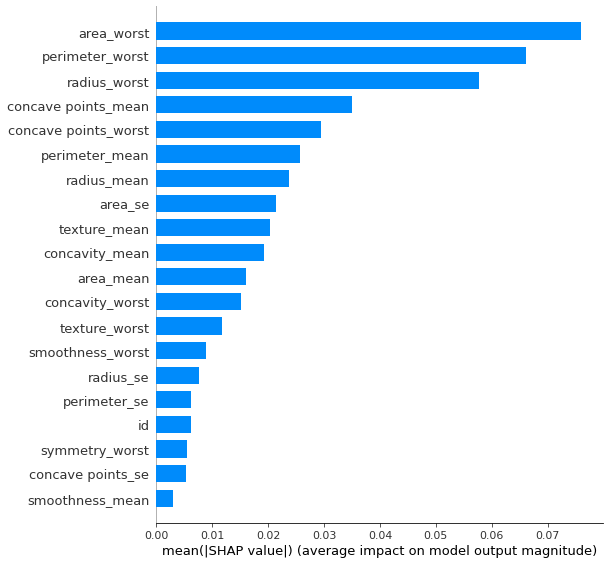

In [ ]:
#Plot a SHAP summary plot using all the features in the data
shap.initjs()
shap.summary_plot(shap_values, test_label, plot_type="bar")

area_worst impacts the most in determining the diagnosis of breast cancer. Features that follow include perimeter_worst, radius_worst etc.

#Task 7

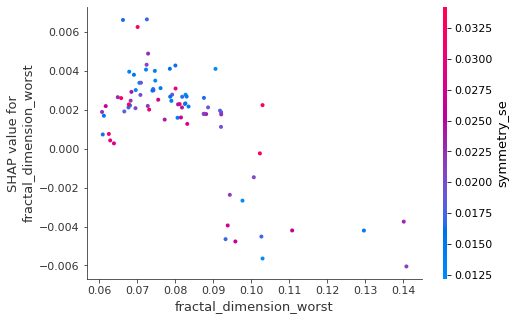

In [ ]:
#Plot a SHAP dependecne plot using all features in the data
shap.initjs()

shap.dependence_plot(ind=test_label.columns.all(), shap_values=shap_values[:len(test_label),:], features = test_label.values, feature_names=test_label.columns)

People with lower fractal_dimension_worst and higher symmetry_se have lower risk of breast cancer.
